Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the cervical canver risk factors dataset and explore the data

In [2]:
cancer_data = pd.read_csv('../raw_data/risk_factors_cervical_cancer.csv', na_values=['?'])

cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [3]:
cancer_data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


This dataset was collected via a survey. Because some of the features are private information, some of the participants opted to leave some of these features blank, so we have some missing values to take care of.

In [4]:
missing = pd.concat([cancer_data.isna().sum(), cancer_data.isna().mean() * 100], axis=1)
missing.columns = ["Count", "%"]
missing

,Count,%
Age,0,0.000000
Number of sexual partners,26,3.030303
First sexual intercourse,7,0.815851
Num of pregnancies,56,6.526807
Smokes,13,1.515152
Smokes (years),13,1.515152
Smokes (packs/year),13,1.515152
Hormonal Contraceptives,108,12.587413
Hormonal Contraceptives (years),108,12.587413
IUD,117,13.636364


It looks like the number of participants who didn't answer was constant through all of the specific STD diagnosis columns as well as the boolean STDs column and the column that shows number of STDs.
The column that shows the number of STD dianoses says that no values are missing, so it may reveal more about the other STD columns with missing values.

The columns showing time since first diagnosis and time since last diagnosis have a very high percentage of missing values. These may be due to participants not answering due to privacy reasons, but it may also be blank as a result of the participant not having been diagnosed at all. This would make an answer as to how much time has passed since a diagnosis make no sense, so a blank would be appropriate in this case.

<Axes: >

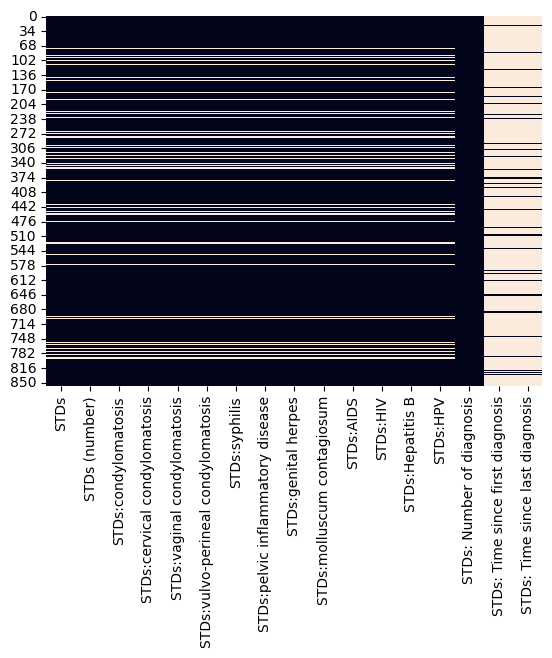

In [5]:
std_data = cancer_data[[column for column in cancer_data if column.startswith('STDs')]]
sns.heatmap(std_data.isnull(), cbar=False)

<Axes: >

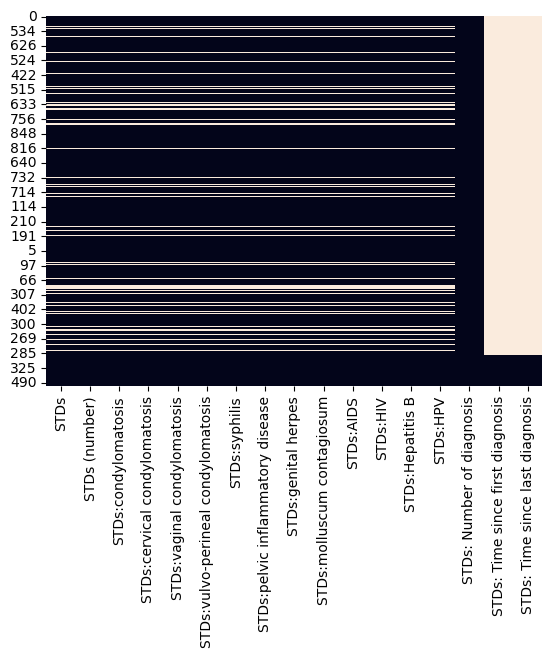

In [6]:
sorted_std_data = std_data.sort_values(by='STDs: Number of diagnosis')
sns.heatmap(sorted_std_data.isnull(), cbar=False)

The number of STD diagnoses in a patient doesn't seem to indicate any pattern in the specific STD columns, but it does in the columns specifying the amount of time since a diagnosis. This could imply that it was left blank just because there wasn't a diagnosis in the first place.

In [7]:
std_data[std_data['STDs'].isna()].sort_values(by='STDs: Number of diagnosis')

,STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis
71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


It appears as though the participants who didn't answer all of the STDs questions have had 0 diagnoses. It may be worth considering filling in some of these values. Perhaps the participants didn't feel the need to answer these questions because they hadn't been diagnosed with these STDs? Maybe they don't know whether they have any STDs? It's not clear why they may have been left blank, so maybe it's better to leave them be for the time being.

<Axes: >

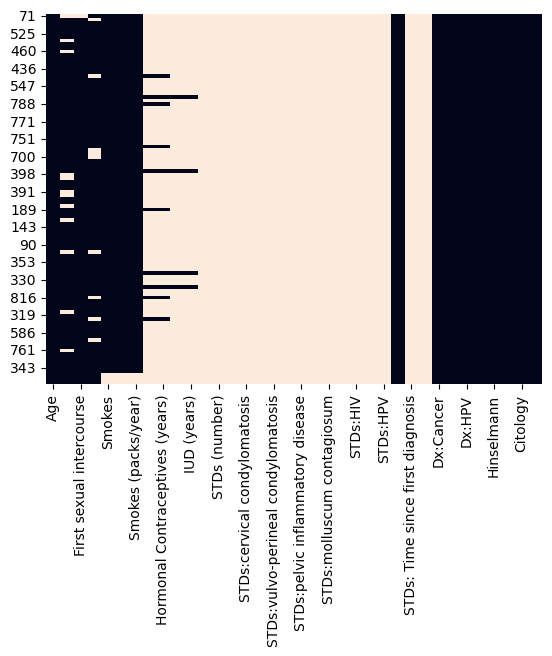

In [8]:
#no_std_data = cancer_data[[column for column in cancer_data if not column.startswith('STDs')]][cancer_data['STDs'].isna()]
no_std_data = cancer_data[cancer_data['STDs'].isna()]
sns.heatmap(no_std_data.sort_values(by='Smokes').isnull(), cbar=False)

There are a few participants who had left almost every question in the survey unanswered. Let's drop those participants from our DataFrame.

In [9]:
no_std_data[no_std_data['Smokes'].isna()]

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
117,30,3.0,16.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
279,22,2.0,17.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
552,18,3.0,16.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0


In [10]:
cancer_data.drop(index=[117, 279, 552], inplace=True)


Let's see if there are any outliers to take care of:

In [25]:
# selecting columns that aren't bool values
non_bool = cancer_data[['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes (years)',
                        'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)', 'STDs: Number of diagnosis',
                        'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']]

non_bool.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis
count,855.000000,829.000000,848.000000,799.000000,845.000000,845.000000,750.000000,741.000000,753.000000,855.000000,71.000000,71.000000
mean,26.832749,2.527141,16.997642,2.277847,1.219721,0.453144,2.256419,0.514804,0.176627,0.087719,6.140845,5.816901
std,8.505205,1.670517,2.807898,1.448497,4.089017,2.226610,3.764254,1.943089,0.561993,0.303031,5.895024,5.755271
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,4.000000,3.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,8.000000,7.500000
max,84.000000,28.000000,32.000000,11.000000,37.000000,37.000000,30.000000,19.000000,4.000000,3.000000,22.000000,22.000000


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, 'Age'),
  Text(2, 0, 'Number of sexual partners'),
  Text(3, 0, 'First sexual intercourse'),
  Text(4, 0, 'Num of pregnancies'),
  Text(5, 0, 'Smokes (years)'),
  Text(6, 0, 'Smokes (packs/year)'),
  Text(7, 0, 'Hormonal Contraceptives (years)'),
  Text(8, 0, 'IUD (years)'),
  Text(9, 0, 'STDs (number)'),
  Text(10, 0, 'STDs: Number of diagnosis'),
  Text(11, 0, 'STDs: Time since first diagnosis'),
  Text(12, 0, 'STDs: Time since last diagnosis')])

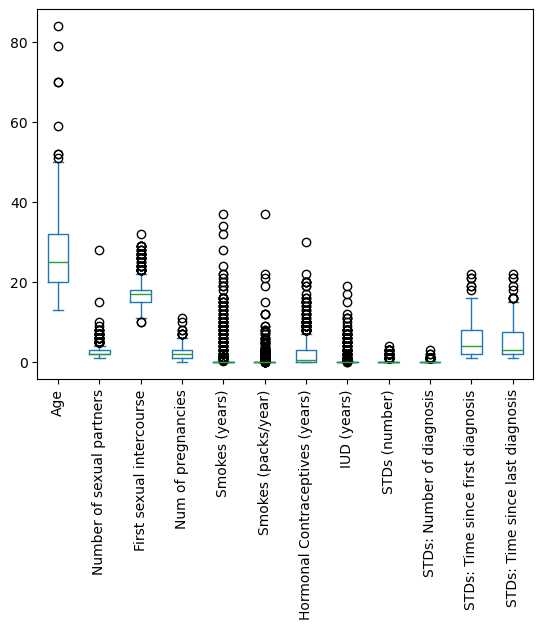

In [38]:
#non_bool.hist(figsize=(12,8))
#plt.subplots_adjust(hspace=0.5, wspace=0.5)
non_bool.plot(kind='box')
plt.xticks(rotation=90)

Many of the numerical columns have quite a few seemingly extreme outliers, but they could still be important to us.

Let's see how many of each diagnosis and positive tests of each type there were.

In [53]:
cancer_data[['Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']].eq(1).sum()

Dx:Cancer     18
Dx:CIN         9
Dx:HPV        18
Dx            24
Hinselmann    35
Schiller      74
Citology      44
Biopsy        55
dtype: int64

These features aren't that large compared to the DataFrame, and the patients with higher values in the numerical risk factors columns are likely some of these. It might be best to keep these records in the dataset so we don't lose these numbers. They could provide us with valuable insights.

This data has a lot of missing values. The features with many missing values would contain information that many may not want to divulge. The values' absence may be a telling part of this data, so it may be worth keeping and fitted using models that can handle missing data.

One thing that I do wonder about is how the AI models would react to values that were left missing (NaN in pandas) vs ones in the yes/no columns and the ones that were given their own category and got assigned to the label 2.

I'm going to save one dataset for both of these options and compare the results.

In [59]:
# save data with values still missing
cancer_data.to_csv('../raw_data/dataset_missing_as_nan.csv')

# fill yes/no columns missing values with 2
cancer_data_with_missing_labels = cancer_data.iloc[:, [4, 7, 9, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], ].fillna(2)

# save data with missing values filled with 2
cancer_data_with_missing_labels.to_csv('../raw_data/dataset_missing_as_2.csv')

Just out of curiosity, let's see how many of our positive diagnoses are in the set of individuals who didn't answer the STDs questions.

In [63]:
# see all data without the participants who left most of the features blank
cancer_data_trimmed = cancer_data[~cancer_data['STDs'].isna()]

cancer_data_trimmed[['Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']].eq(1).sum()

Dx:Cancer     18
Dx:CIN         8
Dx:HPV        18
Dx            23
Hinselmann    35
Schiller      73
Citology      41
Biopsy        53
dtype: int64

If we cut out the participants who left the large chunk of STDs questions blank, we reduce our sample size by 12%, but we retain almost all of the positive diagnoses and test results. Because these features seem the most important at first glance, I'm going to save a dataset without those participants to see if it affects the accuracy of the predictions.

In [64]:
cancer_data_trimmed.to_csv('../raw_data/dataset_trimmed.csv')